In [2]:
import numpy as np
import pandas as pd
import os

In [3]:
data=pd.read_csv('./StudentsPerformance.csv')
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

array([[<Axes: title={'center': 'math score'}>,
        <Axes: title={'center': 'reading score'}>],
       [<Axes: title={'center': 'writing score'}>, <Axes: >]],
      dtype=object)

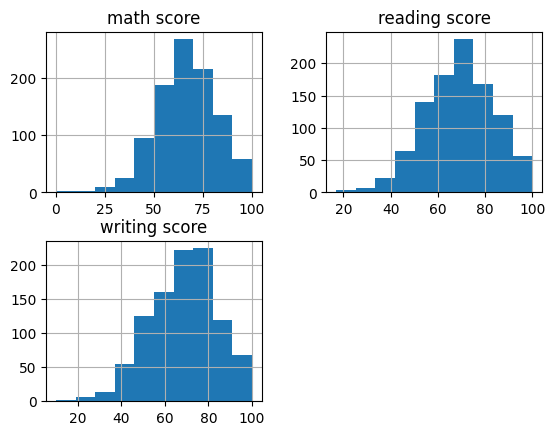

In [5]:
data.hist()

In [10]:
data = data.select_dtypes(include = ['float64','int64'])
data.cov()
data.cov()['math score']
data.cov()['math score']['writing score']
data.corr()
data.corr()['math score']['writing score']

0.8026420459498075

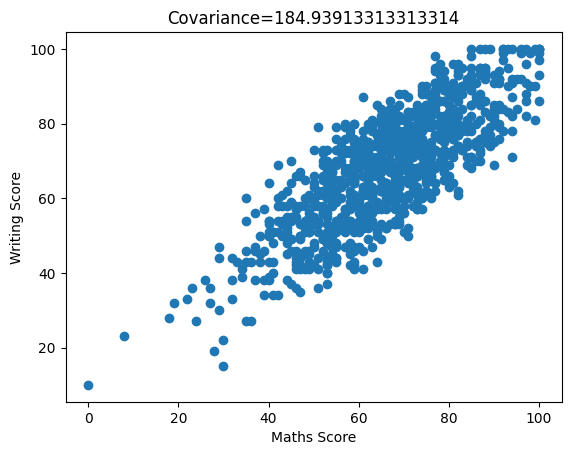

In [11]:
import matplotlib.pyplot as plt
plt.scatter(data['math score'],data['writing score'])
plt.xlabel('Maths Score')
plt.ylabel('Writing Score')
plt.title('Covariance='+str(data.cov()['math score']
 ['writing score']))
plt.show()

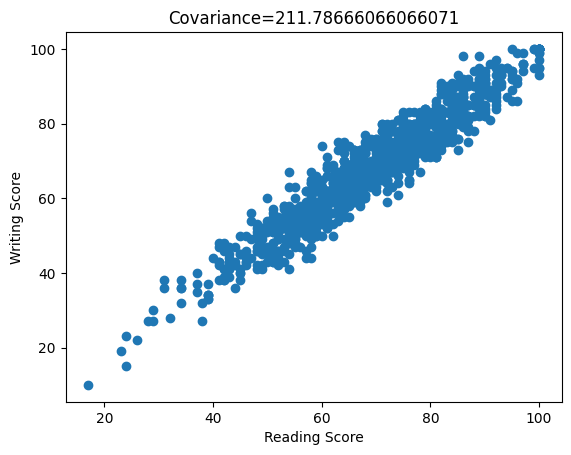

In [12]:
plt.scatter(data['reading score'],data['writing score'])
plt.xlabel('Reading Score')
plt.ylabel('Writing Score')
plt.title('Covariance='+str(data.cov()['reading score']['writing score']))
plt.show()

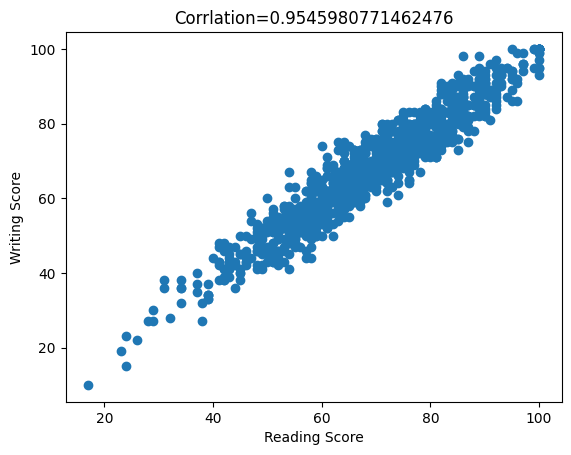

In [14]:
plt.scatter(data['reading score'],data['writing score'])
plt.xlabel('Reading Score')
plt.ylabel('Writing Score')
plt.title('Corrlation='+str(data.corr()['reading score']['writing score']))
plt.show() 

In [15]:
# Selecting read score as predictor(x) and writing score(y) as target
x=data['reading score'].values
y=data['writing score'].values
# Splitting Data into Train and Test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape 

((800,), (200,), (800,), (200,))

0.9945435177890362 -0.6794922130184347


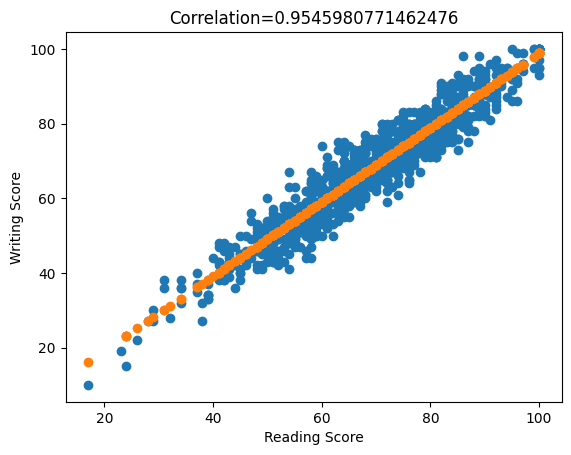

In [21]:
# Finding the slope of the line and intercept using traditional statistical formula
m=np.cov(x_train,y_train)[0,1]/x_train.var()
c=y_train.mean()-(x_train.mean()*m)
print(m,c)
y_pred=(x_train*m)+c
plt.scatter(x,y)
plt.scatter(x_train,y_pred)
plt.xlabel('Reading Score')
plt.ylabel('Writing Score')
plt.title('Correlation='+str(data.corr()['reading score']
 ['writing score']))
plt.show() 

In [17]:
#y_pred-y_train
#np.abs(y_pred-y_train)
np.sum(np.abs(y_pred-y_train))/(x_train.size)
# Prediction for Test data
y_pred=(x_test*m)+c
np.sum(np.abs(y_pred-y_test))/(x_test.size)

3.6870034409251526

In [19]:
# Using Least Squares method
l=x_train.size
x2=x_train**2
y2=y_train**2
xy=x_train*y_train
m= ((l * sum(xy)) - (sum(x_train)*sum(y_train))) / ((l * sum(x2)) - sum(x_train)**2)
m
c= y_train.mean()-m*x_train.mean()
21
c

-0.5927990977521915

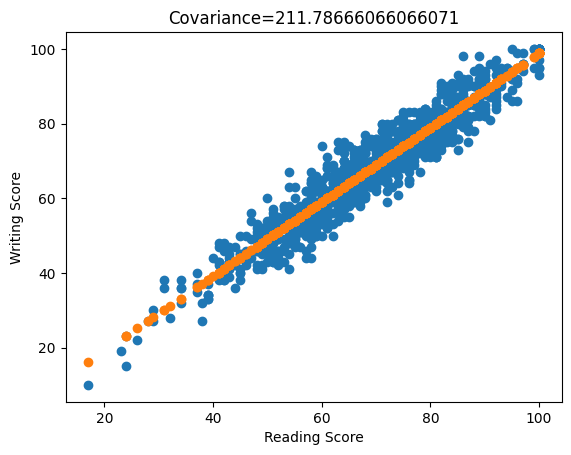

3.59529218231551

In [22]:
y_pred=(x_train*m)+c
plt.scatter(x,y)
plt.scatter(x_train,y_pred)
plt.xlabel('Reading Score')
plt.ylabel('Writing Score')
plt.title('Covariance='+str(data.cov()['reading score']['writing score']))
plt.show()
np.sum(np.abs(y_pred-y_train))/(x_train.size)